In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Digital_Project

Finaldata


In [3]:
!ls /content/drive/MyDrive/Digital_Project/Finaldata

'Daily_Water_Quality_Data_with_Day_Adjusted with DAY.csv'  'Linear Regression.ipynb'
'Extra Practice'					    Merged_Cleaned_data_2014_to_2023.csv
 FinalProject.ipynb					   'Random Forest Regression.ipynb'
'Final updated_Daily historical data final.xlsx'	   'Real Time Data Cleansed.xlsx'


In [4]:
import pandas as pd

# Load all datasets
water_quality_data = pd.read_csv('/content/drive/MyDrive/Digital_Project/Finaldata/Daily_Water_Quality_Data_with_Day_Adjusted with DAY.csv')
historical_data = pd.read_excel('/content/drive/MyDrive/Digital_Project/Finaldata/Final updated_Daily historical data final.xlsx')
merged_data = pd.read_csv('/content/drive/MyDrive/Digital_Project/Finaldata/Merged_Cleaned_data_2014_to_2023.csv')
real_time_data = pd.read_excel('/content/drive/MyDrive/Digital_Project/Finaldata/Real Time Data Cleansed.xlsx')

# Display the first few rows of each dataset
print("Water Quality Data:")
print(water_quality_data.head())

print("\nHistorical Data:")
print(historical_data.head())

print("\nMerged Historical Data (2014-2023):")
print(merged_data.head())

print("\nReal-Time Data:")
print(real_time_data.head())

Water Quality Data:
        Date  IRON DISSOLVED  OXYGEN DISSOLVED (FIELD METER)  PH (FIELD)  \
0  1/20/2014            0.06                       13.560000    7.980000   
1  1/21/2014            0.06                       13.554627    7.978149   
2  1/22/2014            0.06                       13.542525    7.979391   
3  1/23/2014            0.06                       13.530448    7.980630   
4  1/24/2014            0.06                       13.518394    7.981867   

   TEMPERATURE WATER  TURBIDITY  ZINC DISSOLVED  Day_of_Year  Day  
0          -0.030000   3.100000        1.430000           20   20  
1          -0.202312   3.403106        1.484332           21   21  
2          -0.366397   3.667098        1.480835           22   22  
3          -0.529686   3.930075        1.477341           23   23  
4          -0.692182   4.192037        1.473849           24   24  

Historical Data:
        Date  Day_of_Year    Year  Day  \
0 2014-01-01          1.0  2014.0  1.0   
1 2014-01-02 

# **Visualise Data**

In [5]:
import matplotlib.pyplot as plt


--- Visualizing Historical Data ---


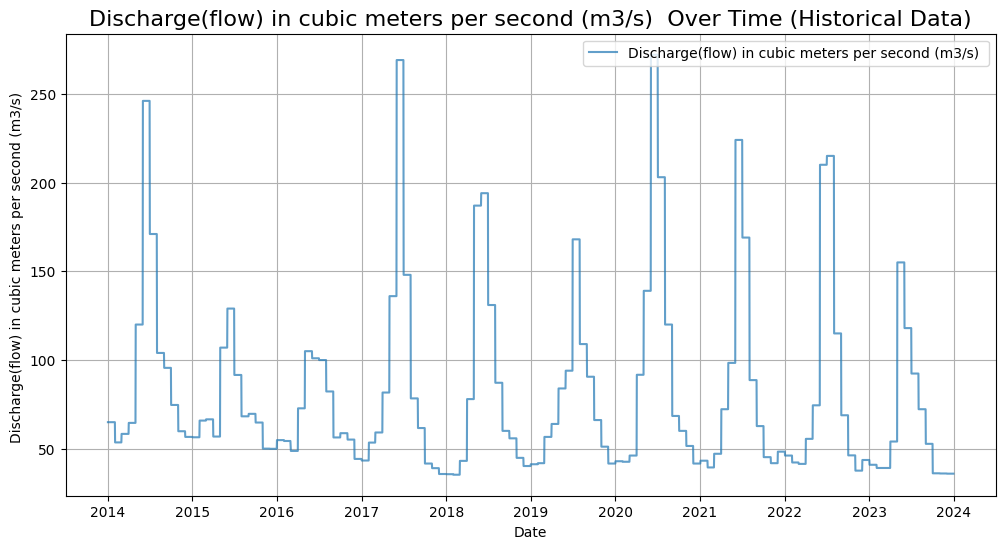

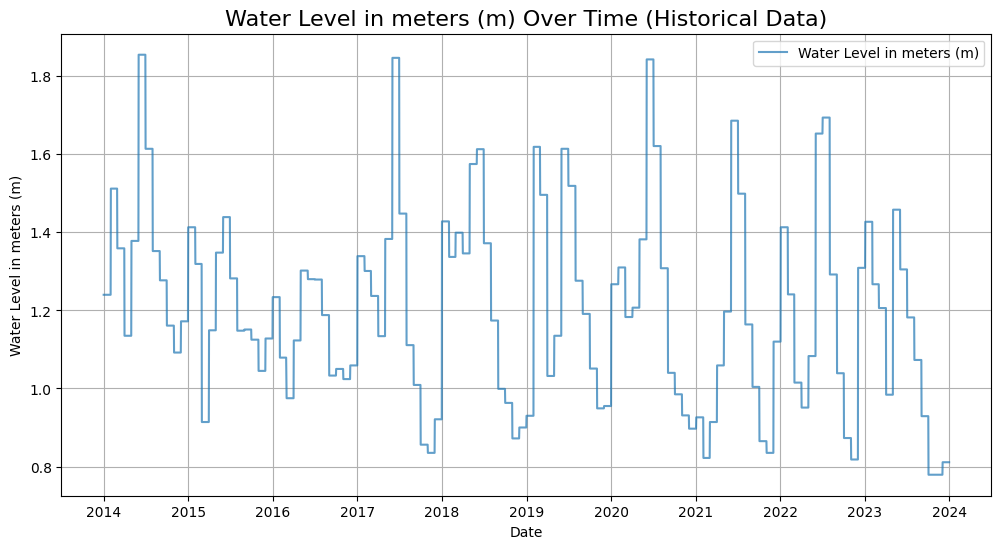

In [6]:
print("--- Visualizing Historical Data ---")

# Ensure 'Date' is in datetime format
historical_data['Date'] = pd.to_datetime(historical_data['Date'], errors='coerce')

# Select numeric features excluding 'Year', 'Day_of_Year', and 'Day'
historical_features = historical_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Year', 'Day_of_Year', 'Day'])

# Line Plots
for feature in historical_features:
    plt.figure(figsize=(12, 6))
    plt.plot(historical_data['Date'], historical_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Historical Data)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()


--- Visualizing Line Plots for Features (Merged Historical Data) ---


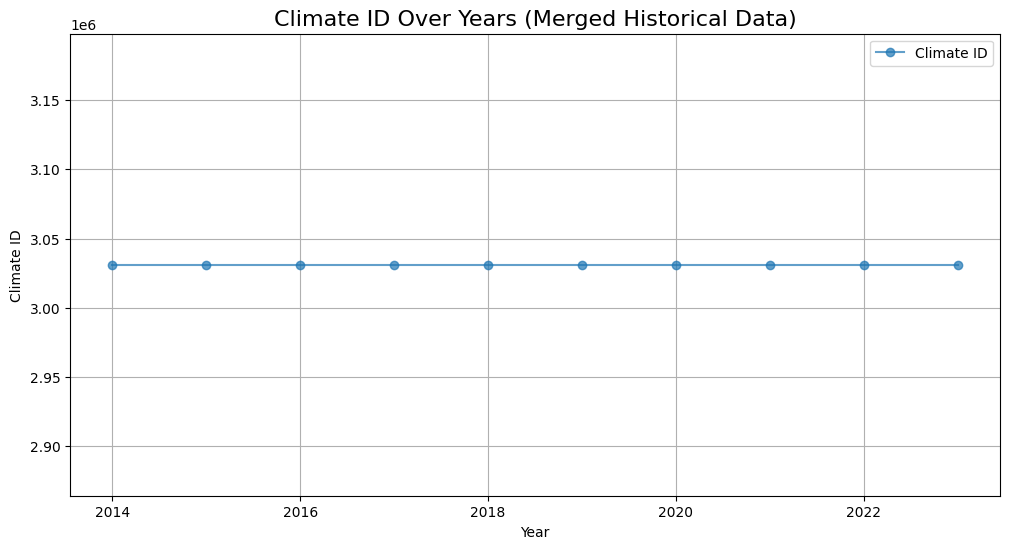

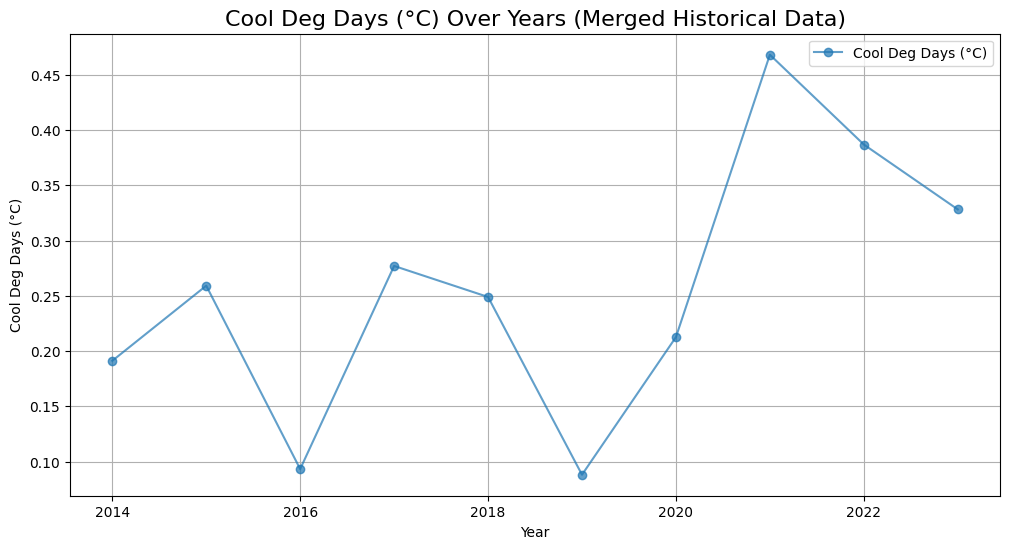

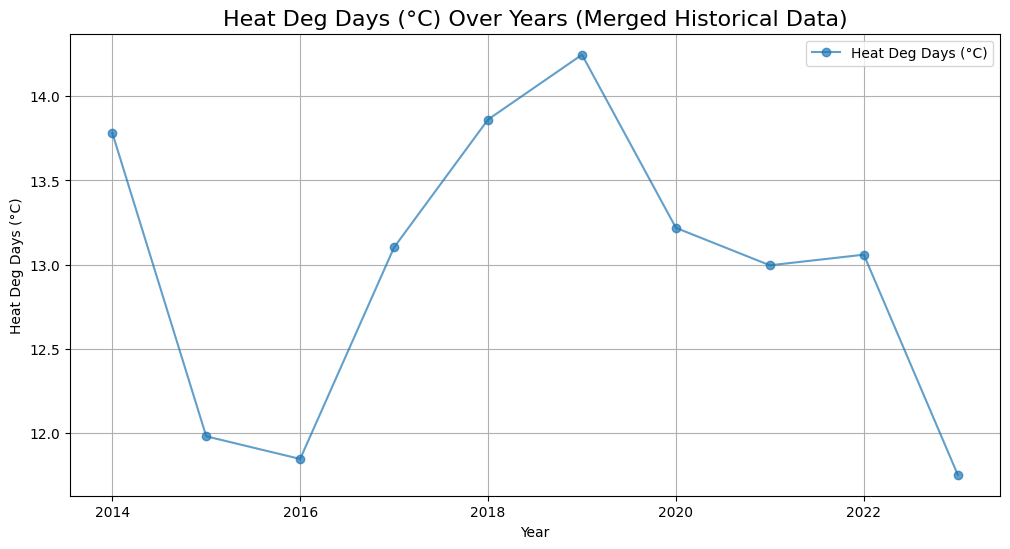

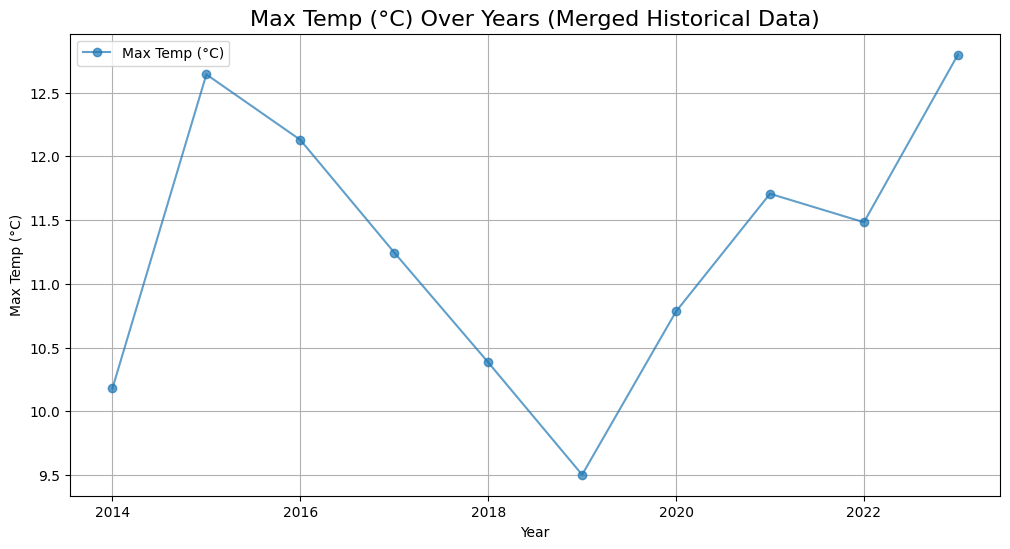

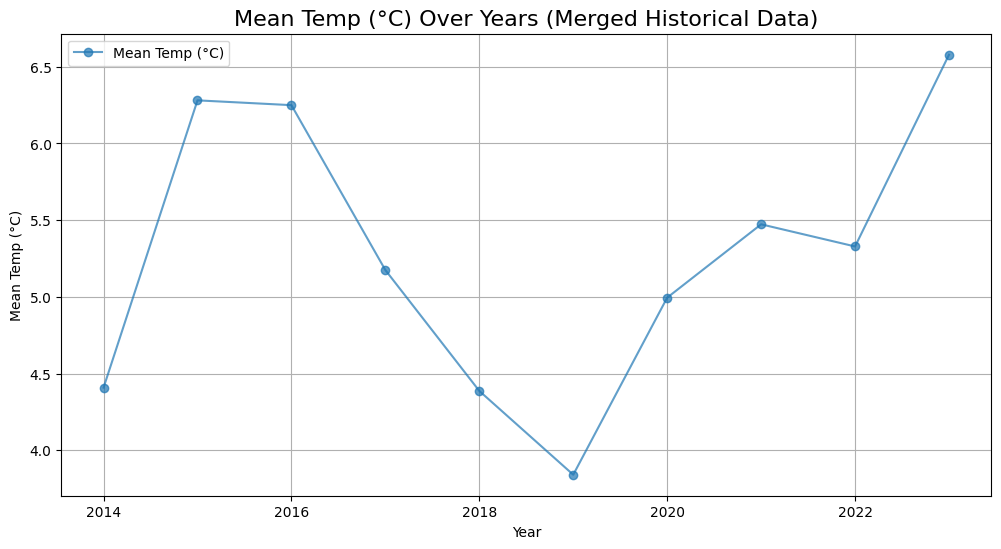

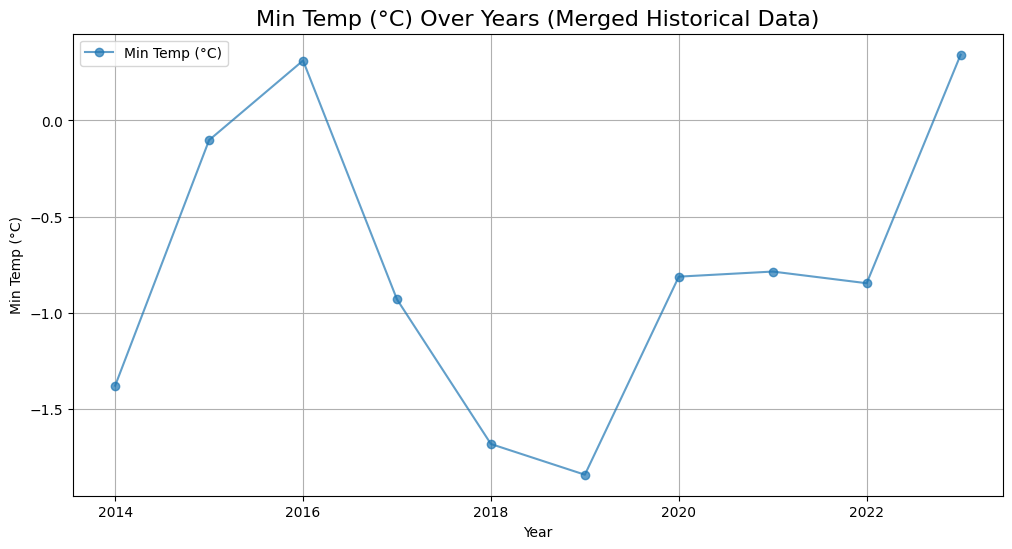

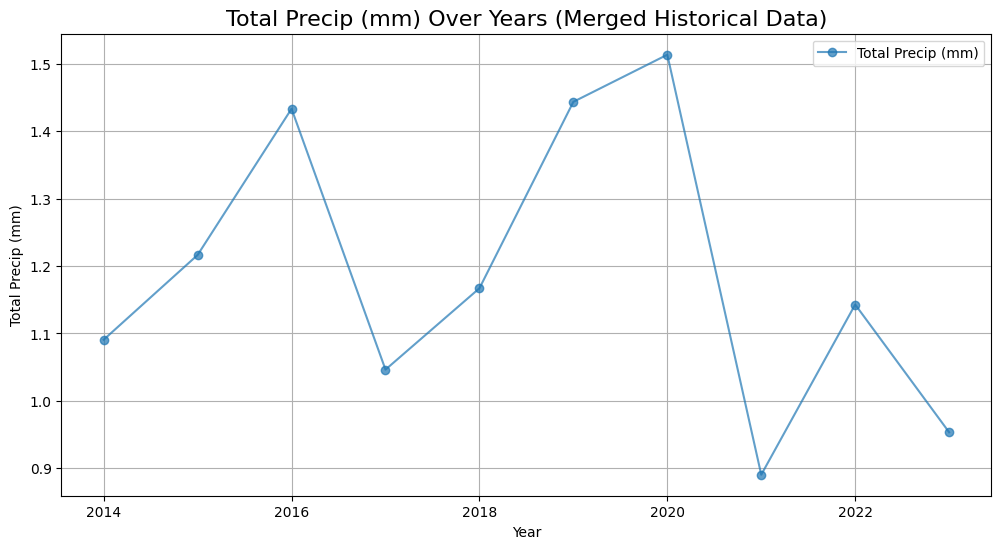

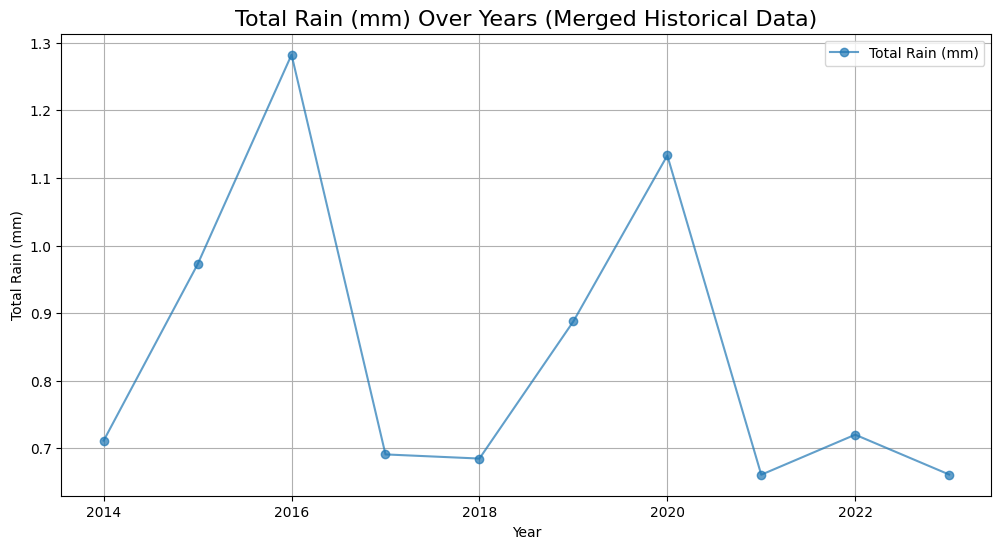

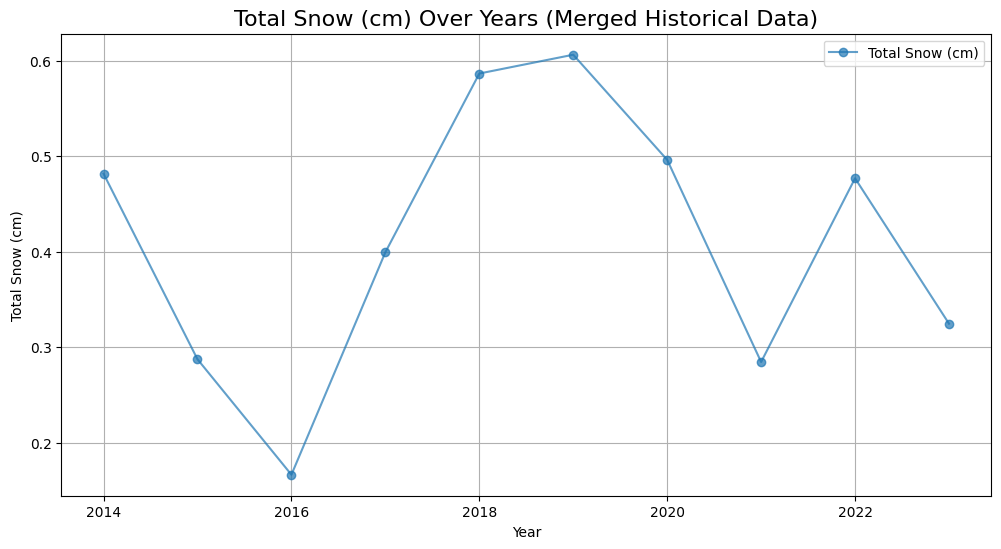

In [7]:
print("--- Visualizing Line Plots for Features (Merged Historical Data) ---")

# Ensure 'Date' is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')

# Extract the 'Year' from the 'Date' column
merged_data['Year'] = merged_data['Date'].dt.year

# Select numeric features excluding irrelevant columns
merged_features = merged_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Longitude (x)', 'Latitude (y)', 'Day_of_Year', 'Day'])

# Aggregate features by year using the mean
annual_data = merged_data.groupby('Year')[merged_features].mean().reset_index()

# Plot line plots for each feature against Year
for feature in merged_features:
    plt.figure(figsize=(12, 6))
    plt.plot(annual_data['Year'], annual_data[feature], label=feature, marker='o', alpha=0.7)
    plt.title(f'{feature} Over Years (Merged Historical Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.grid()
    plt.legend()
    plt.show()



--- Visualizing Water Quality Data ---


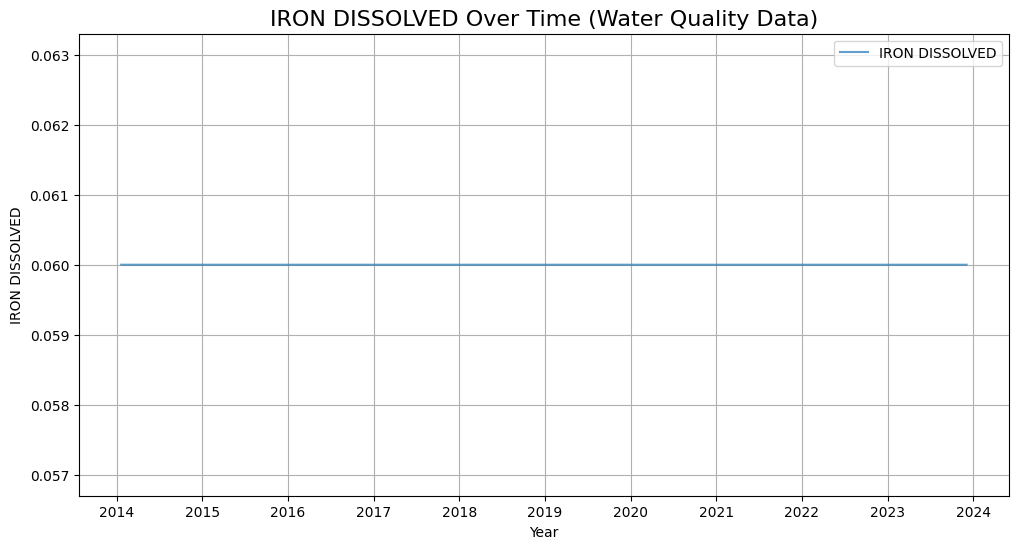

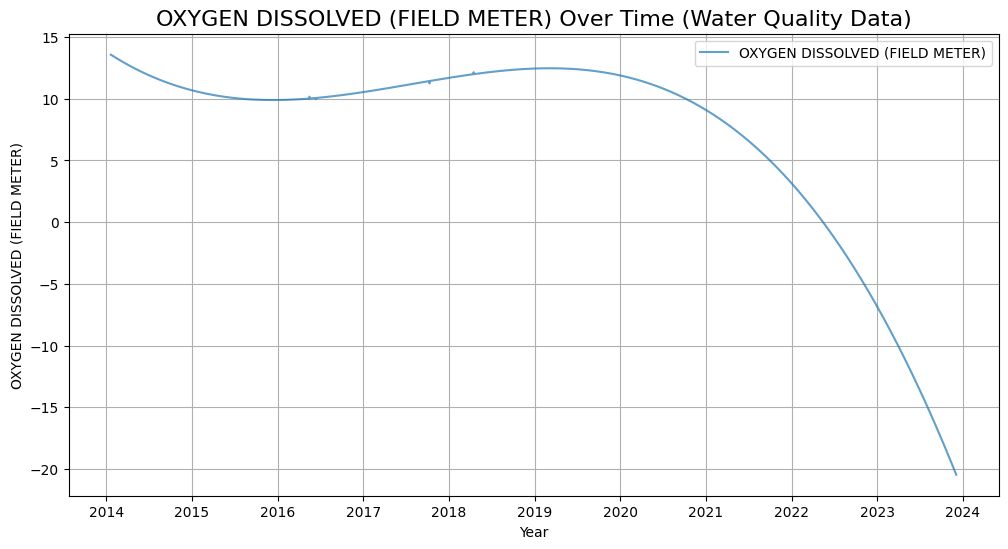

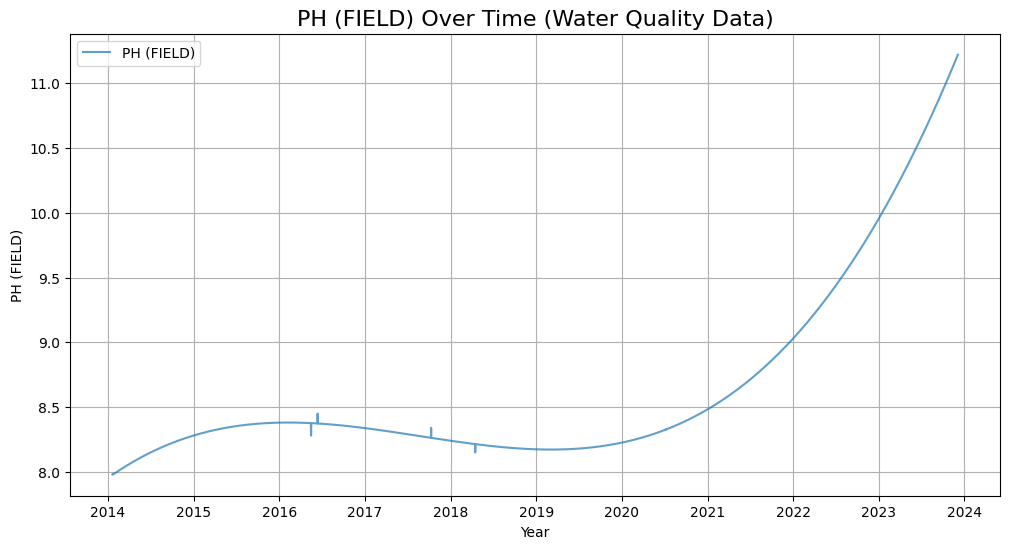

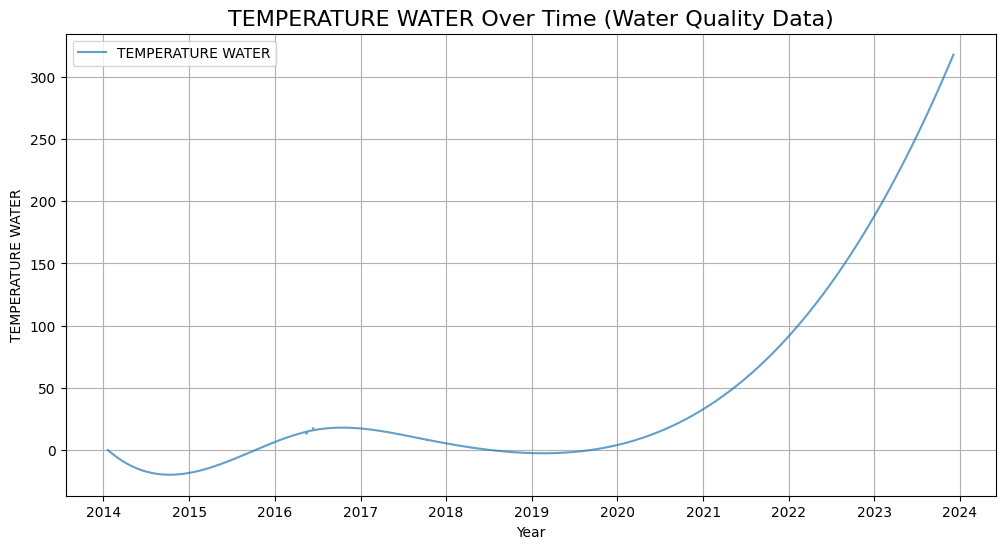

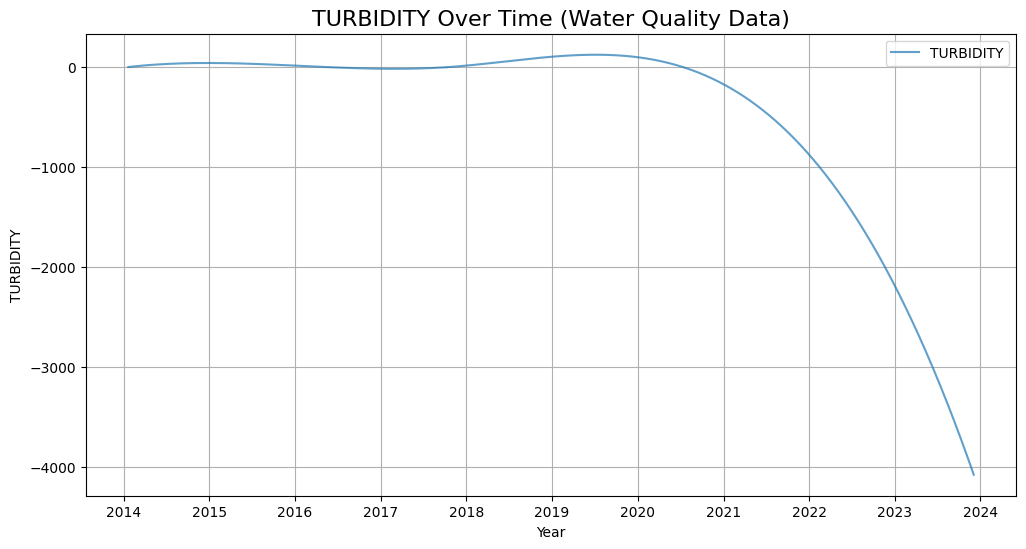

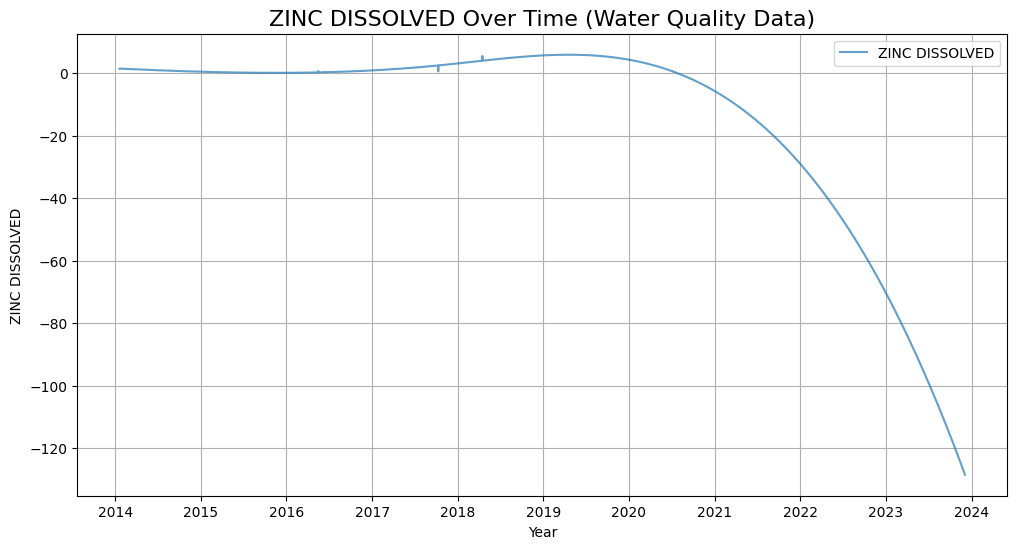

In [8]:
print("--- Visualizing Water Quality Data ---")

# Ensure 'Date' is in datetime format
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'], errors='coerce')

# Select numeric features excluding day-related columns
water_quality_features = water_quality_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Day_of_Year', 'Day'])


# Line Plots
for feature in water_quality_features:
    plt.figure(figsize=(12, 6))
    plt.plot(water_quality_data['Date'], water_quality_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Water Quality Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()



--- Visualizing Water Level and Discharge (Real-Time Data) ---


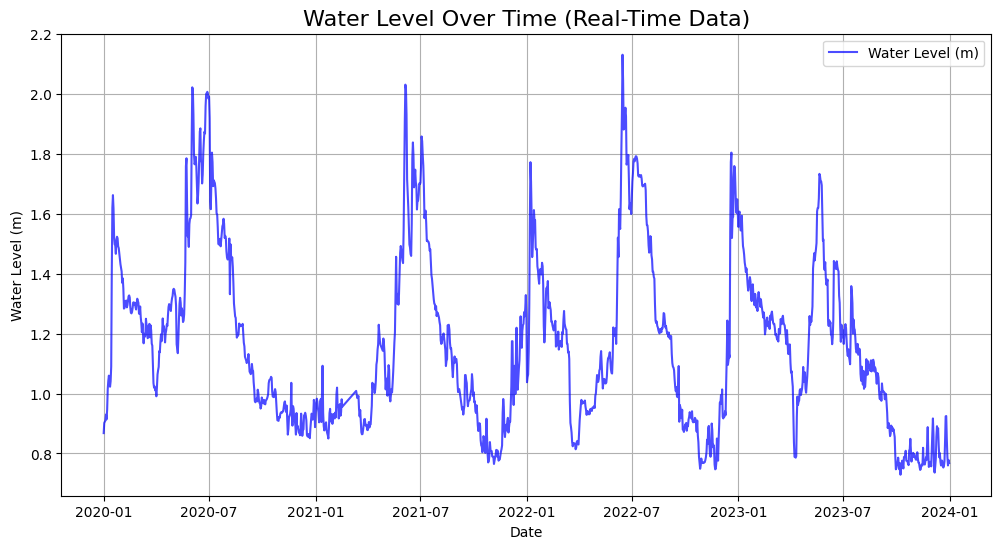

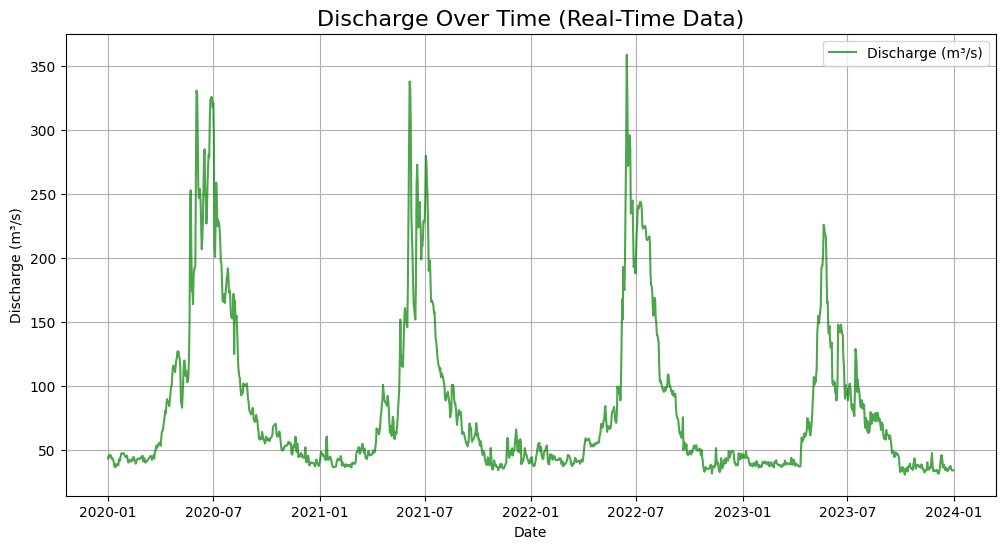

In [9]:
print("--- Visualizing Water Level and Discharge (Real-Time Data) ---")

# Ensure 'Date/Time' is in datetime format
real_time_data['Date/Time'] = pd.to_datetime(real_time_data['Date/Time'], errors='coerce')

# Plot Water Level
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date/Time'], real_time_data['Water Level Daily Mean Value (m)'], label='Water Level (m)', color='blue', alpha=0.7)
plt.title('Water Level Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid()
plt.show()

# Plot Discharge
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date/Time'], real_time_data['Discharge Daily Mean Value (m3/s)'], label='Discharge (m³/s)', color='green', alpha=0.7)
plt.title('Discharge Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid()
plt.show()


# **Feature Engineering**

In [10]:
# Ensure 'Date' and 'Date/Time' are in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')
real_time_data['Date/Time'] = pd.to_datetime(real_time_data['Date/Time'], errors='coerce')

# Merge the datasets
merged_data = pd.merge(merged_data,
                       real_time_data[['Date/Time', 'Water Level Daily Mean Value (m)', 'Discharge Daily Mean Value (m3/s)']],
                       left_on='Date',
                       right_on='Date/Time',
                       how='left')

# Drop redundant 'Date/Time' column
merged_data.drop(columns=['Date/Time'], inplace=True)

# Add Rolling Averages
merged_data['Rainfall_7d_avg'] = merged_data['Total Rain (mm)'].rolling(window=7).mean()
merged_data['Temp_7d_avg'] = merged_data['Mean Temp (°C)'].rolling(window=7).mean()
merged_data['Water_Level_7d_avg'] = merged_data['Water Level Daily Mean Value (m)'].rolling(window=7).mean()
merged_data['Discharge_7d_avg'] = merged_data['Discharge Daily Mean Value (m3/s)'].rolling(window=7).mean()

# Add Lagged Features
merged_data['Rainfall_3d_lag'] = merged_data['Total Rain (mm)'].shift(3)
merged_data['Temp_3d_lag'] = merged_data['Mean Temp (°C)'].shift(3)
merged_data['Water_Level_3d_lag'] = merged_data['Water Level Daily Mean Value (m)'].shift(3)
merged_data['Discharge_3d_lag'] = merged_data['Discharge Daily Mean Value (m3/s)'].shift(3)

# Add Interaction Features
merged_data['Rainfall_Temp_Interaction'] = merged_data['Total Rain (mm)'] * merged_data['Mean Temp (°C)']
merged_data['Discharge_Water_Level_Interaction'] = merged_data['Discharge Daily Mean Value (m3/s)'] * merged_data['Water Level Daily Mean Value (m)']

# Drop rows with NaN values resulting from rolling and lagged feature calculations
merged_data.dropna(subset=['Rainfall_7d_avg', 'Temp_7d_avg', 'Water_Level_7d_avg', 'Discharge_7d_avg',
                           'Rainfall_3d_lag', 'Temp_3d_lag', 'Water_Level_3d_lag', 'Discharge_3d_lag'], inplace=True)

# Display the updated dataset
print("Updated Merged Data with New Features:")
print(merged_data.head())


Updated Merged Data with New Features:
      Longitude (x)  Latitude (y)    Station Name  Climate ID       Date  \
2196        -114.01         51.12  CALGARY INTL A     3031092 2020-01-07   
2197        -114.01         51.12  CALGARY INTL A     3031092 2020-01-08   
2198        -114.01         51.12  CALGARY INTL A     3031092 2020-01-09   
2199        -114.01         51.12  CALGARY INTL A     3031092 2020-01-10   
2200        -114.01         51.12  CALGARY INTL A     3031092 2020-01-11   

      Day_of_Year  Year  Day  Max Temp (°C)  Min Temp (°C)  ...  \
2196            7  2020    7           -6.4          -12.2  ...   
2197            8  2020    8           -7.2          -14.2  ...   
2198            9  2020    9          -13.4          -18.0  ...   
2199           10  2020   10           -6.7          -20.4  ...   
2200           11  2020   11          -10.4          -20.1  ...   

      Rainfall_7d_avg  Temp_7d_avg  Water_Level_7d_avg  Discharge_7d_avg  \
2196              0.0    

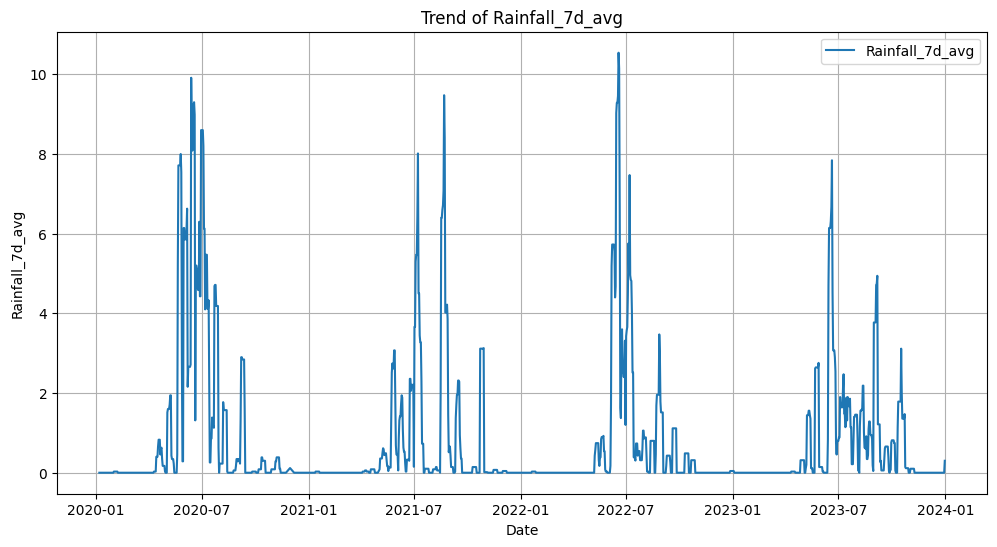

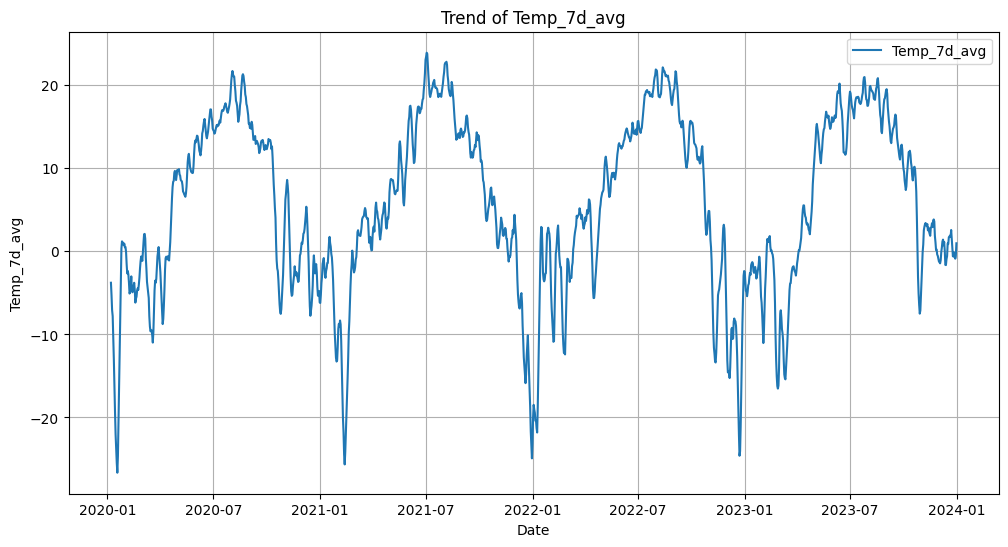

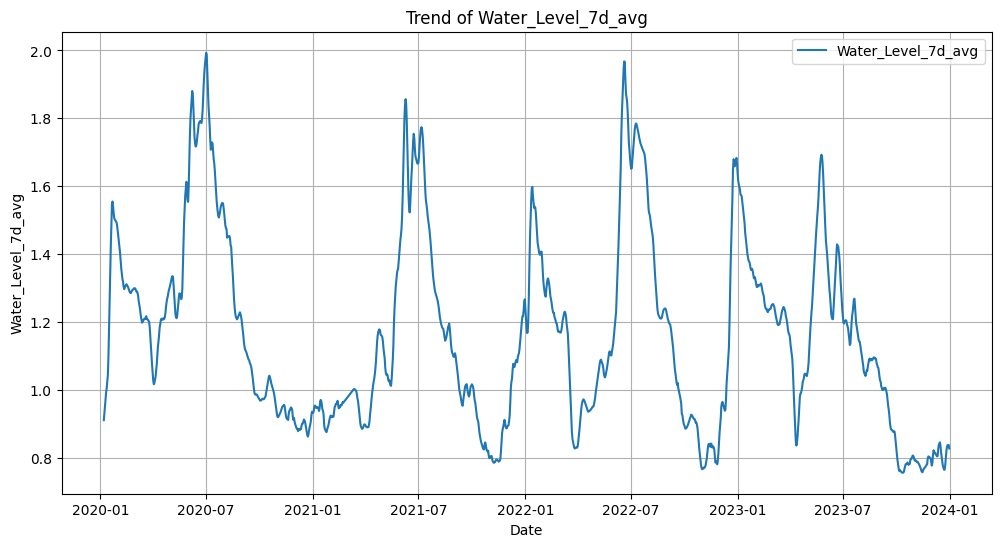

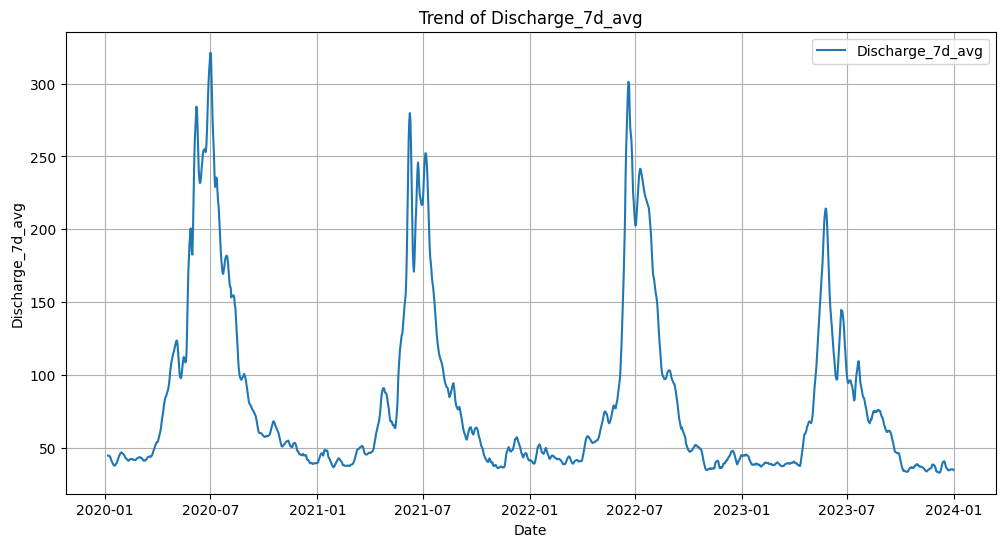

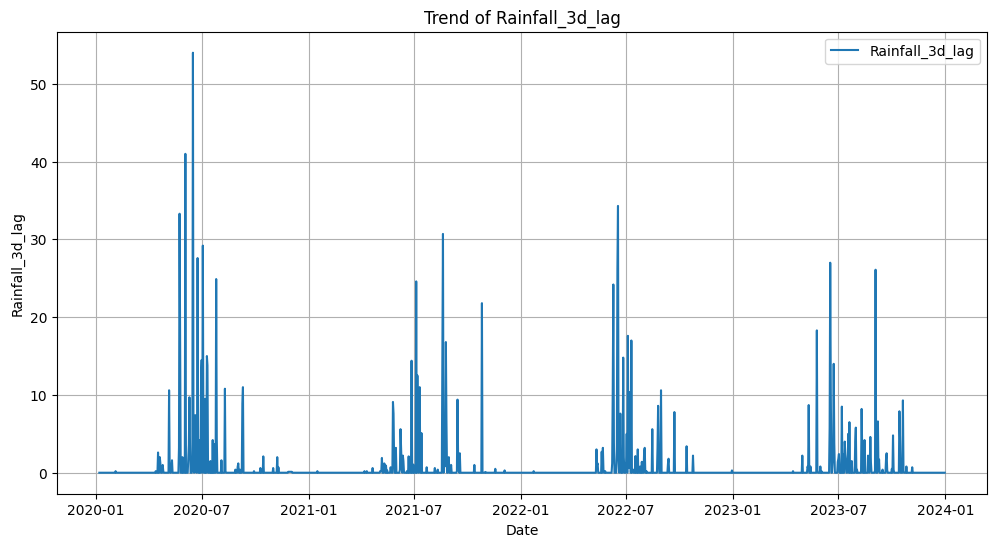

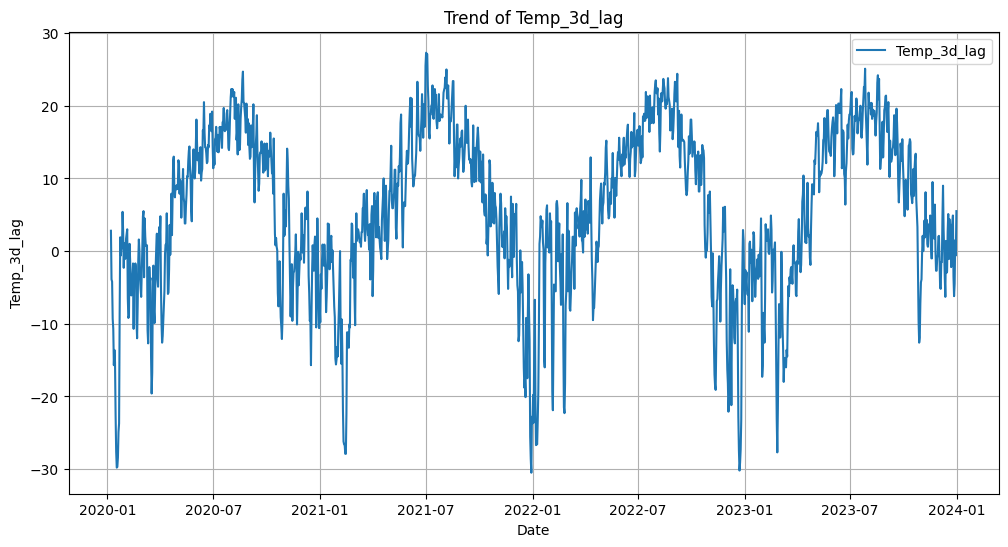

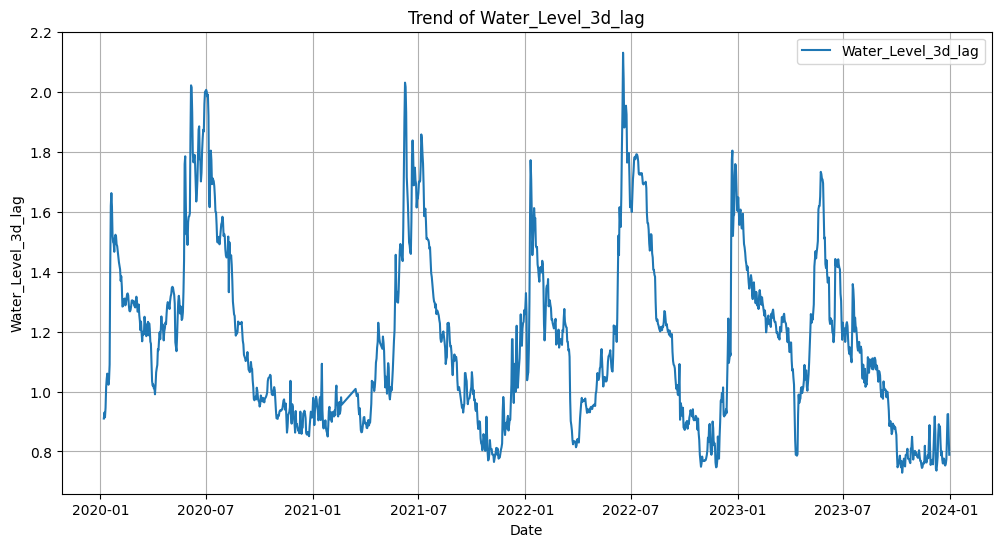

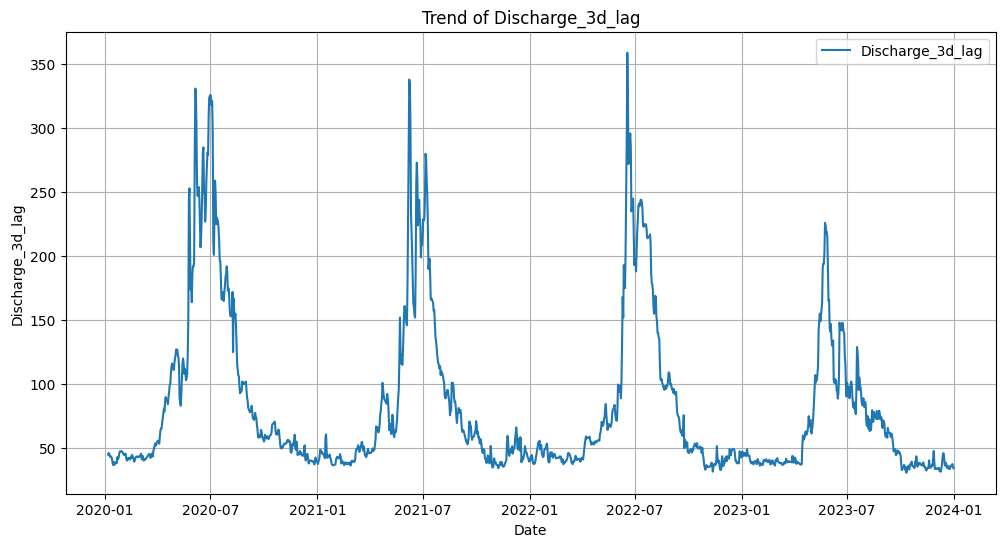

In [11]:
import matplotlib.pyplot as plt

# Plot rolling averages
rolling_features = ['Rainfall_7d_avg', 'Temp_7d_avg', 'Water_Level_7d_avg', 'Discharge_7d_avg']
for feature in rolling_features:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_data['Date'], merged_data[feature], label=feature)
    plt.title(f'Trend of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()

# Plot rolling averages
lag_features = ['Rainfall_3d_lag', 'Temp_3d_lag', 'Water_Level_3d_lag', 'Discharge_3d_lag']
for feature in lag_features:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_data['Date'], merged_data[feature], label=feature)
    plt.title(f'Trend of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()


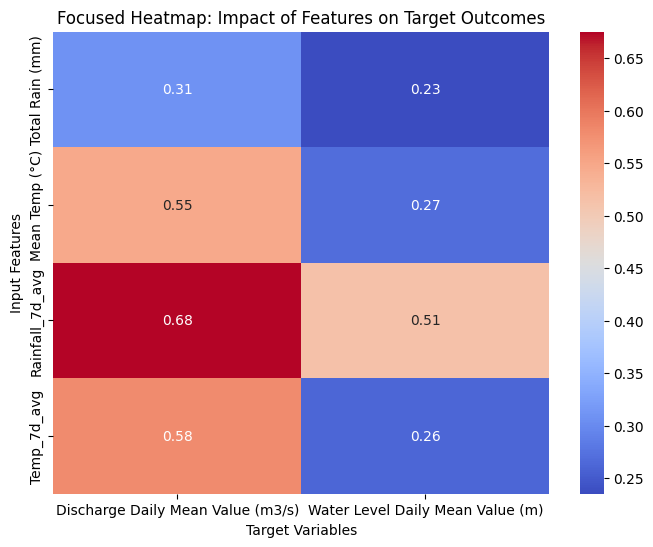

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and targets
input_features = [
    'Total Rain (mm)', 'Mean Temp (°C)', 'Rainfall_7d_avg', 'Temp_7d_avg'
]
target_features = ['Discharge Daily Mean Value (m3/s)', 'Water Level Daily Mean Value (m)']

# Combine inputs and targets for correlation
selected_features = input_features + target_features
filtered_data = merged_data[selected_features]

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Extract correlations of input features with targets
focused_correlation = correlation_matrix[target_features].loc[input_features]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(focused_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Focused Heatmap: Impact of Features on Target Outcomes')
plt.xlabel('Target Variables')
plt.ylabel('Input Features')
plt.show()


# **Model Development**

In [13]:
from sklearn.model_selection import train_test_split

# Define target variable (e.g., Discharge) and input features
target = 'Discharge Daily Mean Value (m3/s)'
features = [
    'Total Rain (mm)', 'Mean Temp (°C)', 'Rainfall_7d_avg', 'Temp_7d_avg',
    'Rainfall_3d_lag', 'Temp_3d_lag', 'Water_Level_7d_avg', 'Discharge_7d_avg',
    'Rainfall_Temp_Interaction', 'Discharge_Water_Level_Interaction'
]

# Drop rows with missing values in the target or features
model_data = merged_data[features + [target]].dropna()

# Split the data into training (80%) and testing (20%) sets
X = model_data[features]
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Linear Regression model
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Display Results
print("Linear Regression Results:")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}\n")

print("Random Forest Results:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")


Linear Regression Results:
Mean Squared Error: 22.92
R-squared: 0.99

Random Forest Results:
Mean Squared Error: 2.63
R-squared: 1.00


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize KFold (4 splits)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# For storing results
lr_mse_scores, lr_r2_scores = [], []
rf_mse_scores, rf_r2_scores = [], []

# Perform K4-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split data
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    # Train Linear Regression
    lr_model.fit(X_train_kf, y_train_kf)
    y_pred_lr_kf = lr_model.predict(X_test_kf)
    lr_mse_scores.append(mean_squared_error(y_test_kf, y_pred_lr_kf))
    lr_r2_scores.append(r2_score(y_test_kf, y_pred_lr_kf))

    # Train Random Forest
    rf_model.fit(X_train_kf, y_train_kf)
    y_pred_rf_kf = rf_model.predict(X_test_kf)
    rf_mse_scores.append(mean_squared_error(y_test_kf, y_pred_rf_kf))
    rf_r2_scores.append(r2_score(y_test_kf, y_pred_rf_kf))

# Compute mean metrics
lr_mse_mean, lr_r2_mean = np.mean(lr_mse_scores), np.mean(lr_r2_scores)
rf_mse_mean, rf_r2_mean = np.mean(rf_mse_scores), np.mean(rf_r2_scores)

# Display results
print("Linear Regression (K4 Fold):")
print(f"Mean MSE: {lr_mse_mean:.2f}, Mean R²: {lr_r2_mean:.2f}")

print("\nRandom Forest (K4 Fold):")
print(f"Mean MSE: {rf_mse_mean:.2f}, Mean R²: {rf_r2_mean:.2f}")


Linear Regression (K4 Fold):
Mean MSE: 27.99, Mean R²: 0.99

Random Forest (K4 Fold):
Mean MSE: 3.56, Mean R²: 1.00


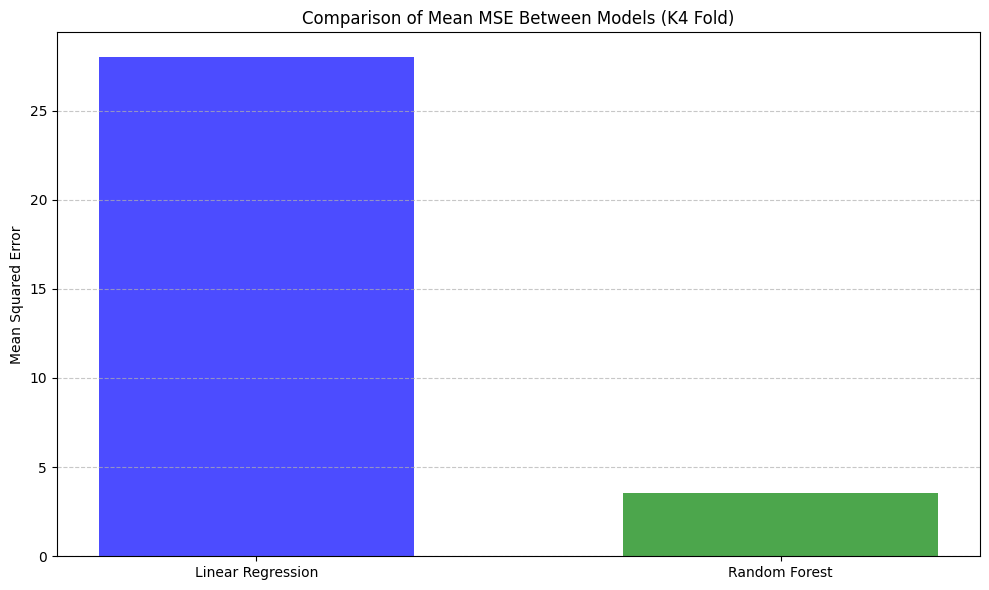

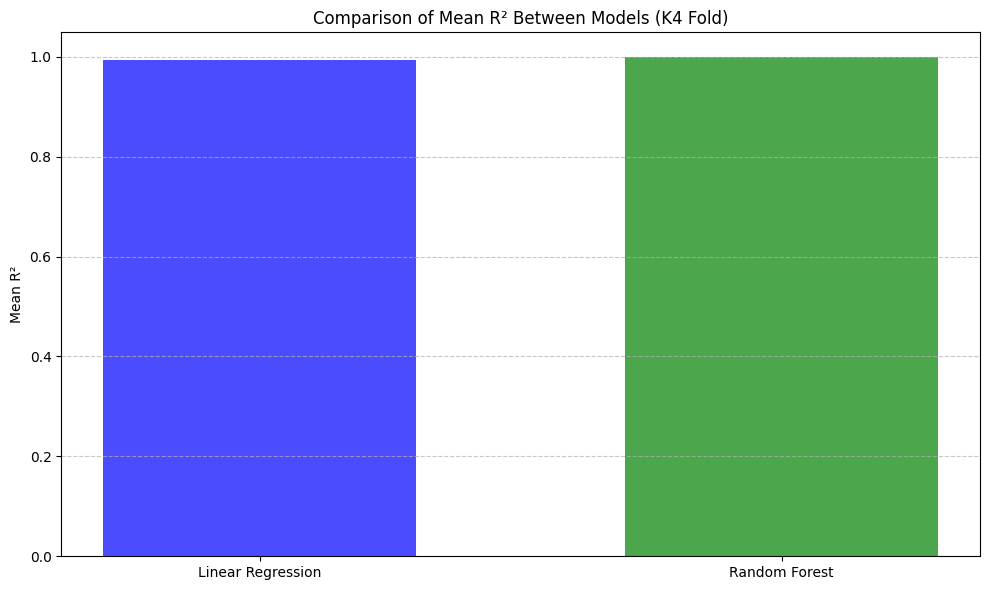

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and their mean metrics
models = ['Linear Regression', 'Random Forest']
mse_means = [lr_mse_mean, rf_mse_mean]
r2_means = [lr_r2_mean, rf_r2_mean]

# Plot comparison for MSE
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
plt.bar(x, mse_means, color=['blue', 'green'], alpha=0.7, width=0.6)
plt.xticks(x, models)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean MSE Between Models (K4 Fold)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot comparison for R²
plt.figure(figsize=(10, 6))
plt.bar(x, r2_means, color=['blue', 'green'], alpha=0.7, width=0.6)
plt.xticks(x, models)
plt.ylabel('Mean R²')
plt.title('Comparison of Mean R² Between Models (K4 Fold)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


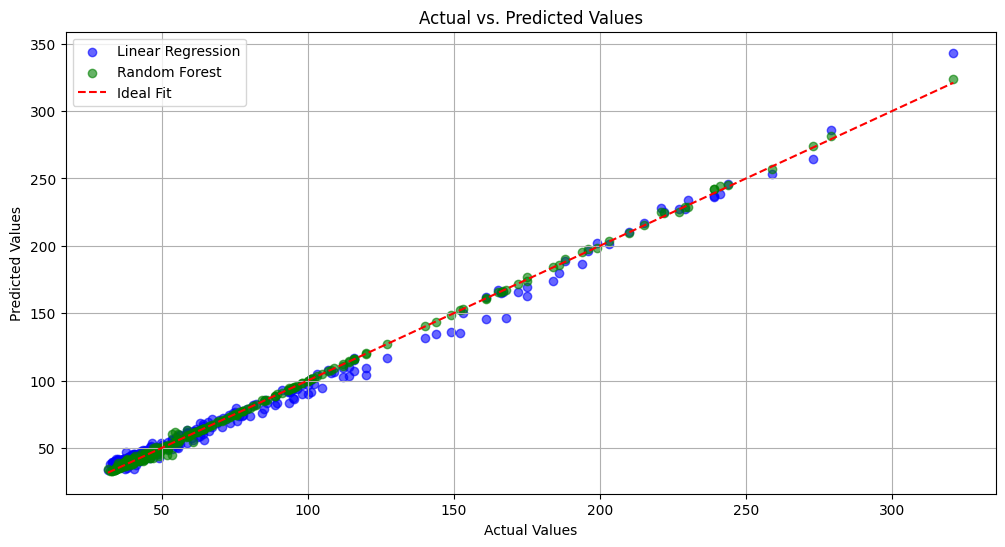

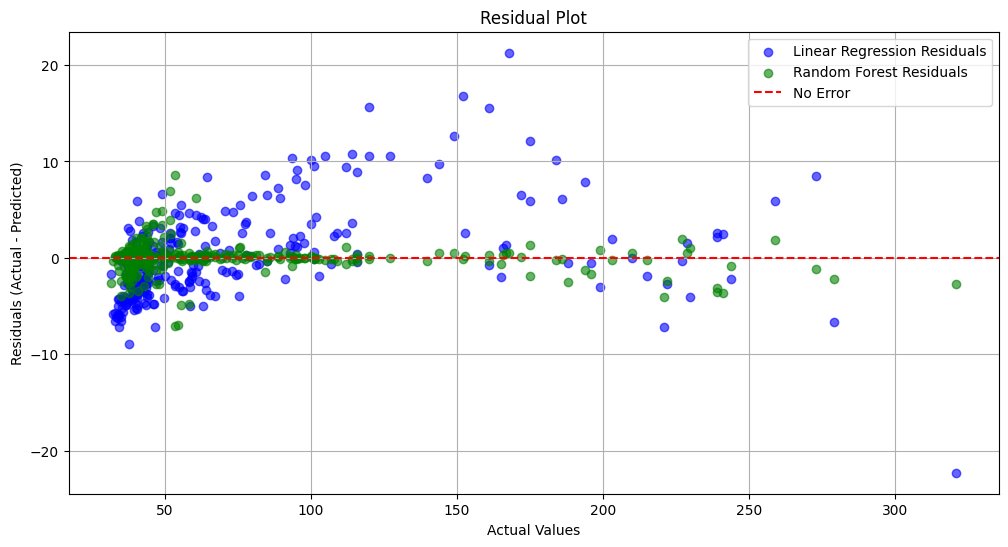

In [17]:
import matplotlib.pyplot as plt

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Residual Plot: Actual - Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test - y_pred_lr, alpha=0.6, label='Linear Regression Residuals', color='blue')
plt.scatter(y_test, y_test - y_pred_rf, alpha=0.6, label='Random Forest Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='No Error')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.grid()
plt.show()


# **Comparison of Real Time with Historical Data**

In [18]:
import pandas as pd
results_without_realtime = {
    'Linear Regression': {'MSE': 22.92, 'R2': 0.99},
    'Random Forest': {'MSE': 2.63, 'R2': 1.00}
}

results_with_realtime = {
    'Linear Regression': {'MSE': 708.42, 'R2': 0.74},
    'Random Forest': {'MSE': 2.204, 'R2': 0.99}
}
# Convert to DataFrame
comparison_df = pd.DataFrame({
    'Without Real-Time Data': results_without_realtime,
    'With Real-Time Data': results_with_realtime
}).T

# Display results
print("Comparison Table:")
print(comparison_df)


Comparison Table:
                                  Linear Regression  \
Without Real-Time Data   {'MSE': 22.92, 'R2': 0.99}   
With Real-Time Data     {'MSE': 708.42, 'R2': 0.74}   

                                     Random Forest  
Without Real-Time Data    {'MSE': 2.63, 'R2': 1.0}  
With Real-Time Data     {'MSE': 2.204, 'R2': 0.99}  


Since Random Forest performs better in both cases, we use random forest model for our future prediction

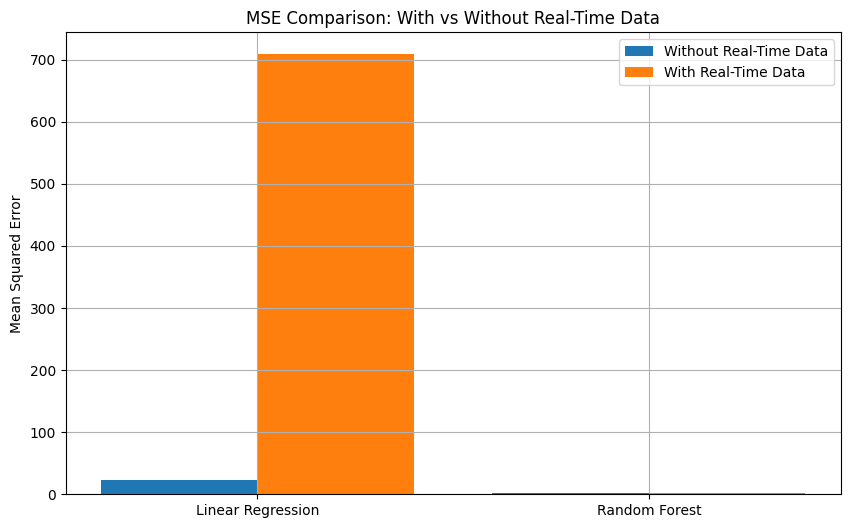

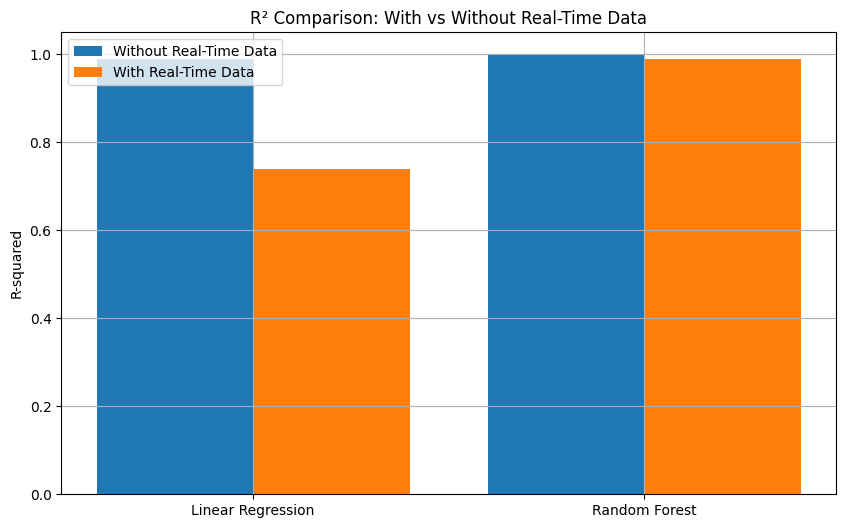

In [19]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear Regression', 'Random Forest']
mse_without = [results_without_realtime[model]['MSE'] for model in models]
mse_with = [results_with_realtime[model]['MSE'] for model in models]

# Bar Chart: MSE Comparison
plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar(x, mse_without, width=0.4, label='Without Real-Time Data', align='center')
plt.bar([i + 0.4 for i in x], mse_with, width=0.4, label='With Real-Time Data', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison: With vs Without Real-Time Data')
plt.legend()
plt.grid()
plt.show()

# Bar Chart: R² Comparison
r2_without = [results_without_realtime[model]['R2'] for model in models]
r2_with = [results_with_realtime[model]['R2'] for model in models]

plt.figure(figsize=(10, 6))
plt.bar(x, r2_without, width=0.4, label='Without Real-Time Data', align='center')
plt.bar([i + 0.4 for i in x], r2_with, width=0.4, label='With Real-Time Data', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('R-squared')
plt.title('R² Comparison: With vs Without Real-Time Data')
plt.legend()
plt.grid()
plt.show()


# **Prediction of Future Water Consumption**

---



In [20]:
# Generate feature values based on February statistics
february_data = merged_data[merged_data['Month'] == 2]
feature_means = february_data[features].mean()
feature_stds = february_data[features].std()

simulated_features = {
    col: np.random.normal(loc=feature_means[col], scale=feature_stds[col]) for col in features
}
simulated_features_df = pd.DataFrame([simulated_features])

# Predict discharge
lr_discharge_prediction = lr_model.predict(simulated_features_df)[0]
rf_discharge_prediction = rf_model.predict(simulated_features_df)[0]


print(f"Linear Regression Prediction for Discharge on {target_date.date()}: {lr_discharge_prediction:.2f}")
print(f"Random Forest Prediction for Discharge on {target_date.date()}: {rf_discharge_prediction:.2f}")


KeyError: 'Month'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Randomly generate a date in 2024
random_date = pd.to_datetime(f"2024-{np.random.randint(1, 13):02d}-{np.random.randint(1, 29):02d}")
print(f"Prediction for: {random_date.date()}")

# Use overall dataset statistics for realistic feature simulation
features = [
    'Total Rain (mm)', 'Mean Temp (°C)', 'Rainfall_7d_avg', 'Temp_7d_avg',
    'Rainfall_3d_lag', 'Temp_3d_lag', 'Water_Level_7d_avg', 'Discharge_7d_avg',
    'Rainfall_Temp_Interaction', 'Discharge_Water_Level_Interaction'
]

# Calculate feature means and standard deviations
feature_means = merged_data[features].mean()
feature_stds = merged_data[features].std()

# Simulate realistic feature values based on overall statistics
simulated_features = {
    col: np.random.normal(loc=feature_means[col], scale=feature_stds[col]) for col in features
}
simulated_features_df = pd.DataFrame([simulated_features])

# Predict discharge and water level using trained models
# Assuming lr_model and rf_model are your trained models for discharge
lr_discharge_prediction = lr_model.predict(simulated_features_df)[0]
rf_discharge_prediction = rf_model.predict(simulated_features_df)[0]

# Display predictions
print(f"Linear Regression Prediction for Discharge on {random_date.date()}: {lr_discharge_prediction:.2f}")
print(f"Random Forest Prediction for Discharge on {random_date.date()}: {rf_discharge_prediction:.2f}")
